In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('kc_house_data.csv')

### Display data set

In [4]:
pd.set_option('display.max_columns',None) # display all columns
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### id variable analysis

In [5]:
df['id'].value_counts() #Checking the number of occurence of each id so we can identify if this id can be considered the primary key for this data set

id
795000620     3
8651510380    2
2568300045    2
9353300600    2
4139480200    2
             ..
2767603649    1
1446403617    1
5602000275    1
1786200010    1
1523300157    1
Name: count, Length: 21436, dtype: int64

In [6]:
df[df['id']==795000620]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17602,795000620,20140924T000000,115000.0,3,1.0,1080,6250,1.0,0,0,2,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250
17603,795000620,20141215T000000,124000.0,3,1.0,1080,6250,1.0,0,0,2,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250
17604,795000620,20150311T000000,157000.0,3,1.0,1080,6250,1.0,0,0,2,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250


### bedrooms vs house space analysis

The purpose of the below study is to proof by data that bedrooms is a categorical variable by trying to get the relationship between this variable and the house space.

In [7]:
df[['id','bedrooms','sqft_living','sqft_above','floors']].sort_values('bedrooms',ascending =False).head(15)

,id,bedrooms,sqft_living,sqft_above,floors
15870,2402100895,33,1620,1040,1.0
8757,1773100755,11,3000,2400,2.0
15161,5566100170,10,3610,3010,2.0
13314,627300145,10,4590,2500,1.0
19254,8812401450,10,2920,1860,2.0
8546,424049043,9,4050,4050,2.0
4096,1997200215,9,3830,2450,2.5
4235,2902200015,9,3680,2830,2.0
16844,8823900290,9,4620,3870,2.5
6079,9822700190,9,3650,2530,2.0


In [10]:
# the range of sqft_living and sqft_above of all houses
print('sqft_living range',[df['sqft_living'].min(),df['sqft_living'].max()])
print('sqft_above range',[df['sqft_above'].min(),df['sqft_above'].max()])

sqft_living range [290, 13540]
sqft_above range [290, 9410]


In [38]:
sqft_living_intervals = pd.cut(df['sqft_living'],30).value_counts().reset_index().sort_values('sqft_living')
sqft_living_intervals

,sqft_living,count
9,"(276.75, 731.667]",264
3,"(731.667, 1173.333]",2580
0,"(1173.333, 1615.0]",4726
1,"(1615.0, 2056.667]",4606
2,"(2056.667, 2498.333]",3650
4,"(2498.333, 2940.0]",2458
5,"(2940.0, 3381.667]",1508
6,"(3381.667, 3823.333]",814
7,"(3823.333, 4265.0]",458
8,"(4265.0, 4706.667]",267


<Axes: xlabel='sqft_living'>

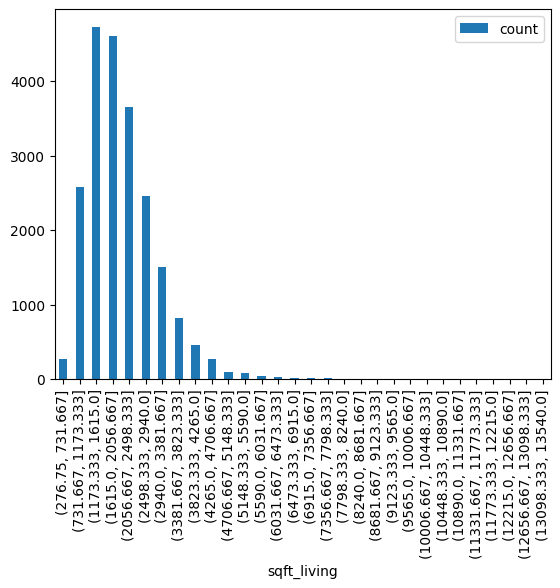

In [52]:
from matplotlib import pyplot
sqft_living_intervals.plot.bar(x='sqft_living', y='count', rot=90)

,bedrooms,count
0,3,9824
1,4,6882
2,2,2760
3,5,1601
4,6,272
5,1,199
6,7,38
7,0,13
8,8,13
9,9,6


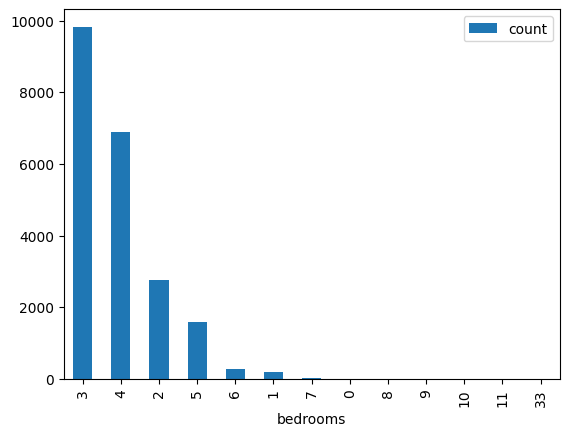

In [56]:
df_bed_count = df['bedrooms'].value_counts().reset_index()
df_bed_count.plot.bar(x='bedrooms', y='count', rot=90)
df_bed_count

In [49]:
df_agg = df.groupby('bedrooms')[['sqft_living','sqft_above']].agg(['min','max']).reset_index()
df_agg

bedrooms sqft_living        sqft_above      
                    min    max        min   max
0         0         290   4810        290  4810
1         1         370   3000        370  3000
2         2         440   6840        440  4350
3         3         490   6400        490  5480
4         4         800   7850        580  7850
5         5        1120  10040        760  8020
6         6        1370  12050        900  8860
7         7        1940  13540       1400  9410
8         8        2280   7710       1210  6090
9         9        2820   4620       1880  4050
10       10        2920   4590       1860  3010
11       11        3000   3000       2400  2400
12       33        1620   1620       1040  1040

<Axes: xlabel='bedrooms'>

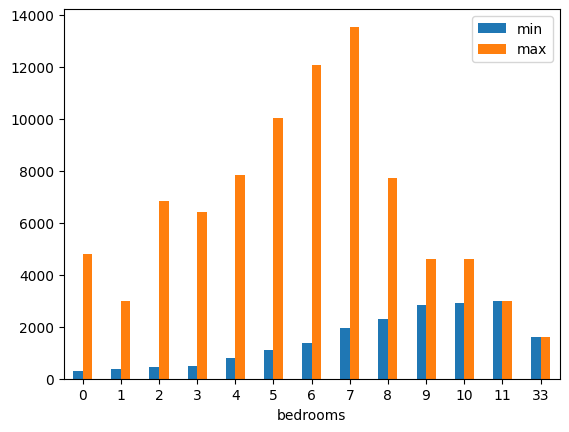

In [74]:
df_agg.plot.bar(x='bedrooms', y='sqft_living', rot=0)

<Axes: xlabel='bedrooms'>

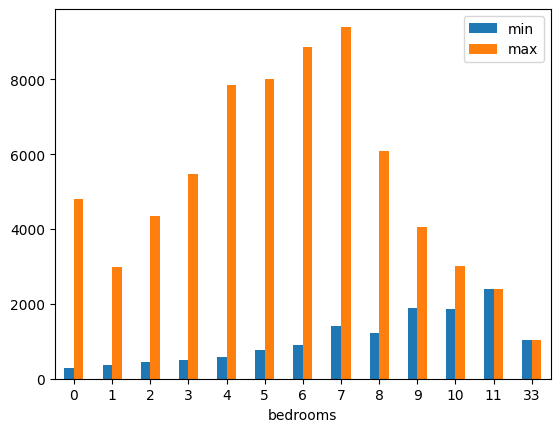

In [75]:
df_agg.plot.bar(x='bedrooms', y='sqft_above', rot=0)